# TP3: Detector de SPAM

## Integrantes

- Nicolás Rodriguez da Cruz
- Francisco Cofré
- Gaspar Acevedo Zain
- Juan Chunga
- Rodrigo Nicolás Lauro

### Imports y carga del dataset

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
dataset = pd.read_csv("dataset/spambase.csv")

In [3]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,104.553358,213.014345,280.656379,65.424908,312.222995,95.900891,114.207564,105.294501,90.067377,239.413171,...,179.823734,5.444469,31.869159,38.574440,139.030428,16.975875,269.068898,75.810259,44.237992,0.394045
std,305.357562,1290.574888,504.142884,1395.151370,672.511666,273.824083,391.440302,401.071452,278.615864,644.755399,...,911.118627,76.274271,285.734646,243.470469,270.355374,109.394164,815.669848,245.879440,429.341596,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,420.000000,0.000000,380.000000,0.000000,0.000000,0.000000,0.000000,160.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,315.000000,52.000000,0.000000,1.000000
max,4540.000000,14280.000000,5100.000000,42810.000000,10000.000000,5880.000000,7270.000000,11110.000000,5260.000000,18180.000000,...,22050.000000,2170.000000,10000.000000,4385.000000,9752.000000,4081.000000,32478.000000,6003.000000,19829.000000,1.000000


### 1. ¿Cuáles son las 10 palabras o símbolos más frecuentes en correos SPAM y en correos NO SPAM?

1. ¿Hay palabras o símbolos en común?
1. ¿Alguna resulta llamativa?

#### Resolución

*10 palabras más repetidas en correos **NO spam***
| Palabra | Frecuencia |
| --- | --- |
| you | $3541702$ |
| george | $3527559$ |
| hp | $2496576$|
| will | $1495268$ |
| your | $1223098$ |
| hpl | $1204398$ |
| re | $1159138$ |
| edu | $800669$ |
| address | $681569$ |
| meeting | $604460$ |

*10 palabras más repetidas en correos **spam***
| Palabra | Frecuencia |
| --- | --- |
| you | $4105599$ |
| your | $2502597$ |
| will | $997100$ |
| free | $939790$ |
| our | $931799$ |
| ! | $931352$ |
| all | $732080$ |
| mail | $635470$ |
| email | $578759$ |
| business | $52125$ |

##### 1.1 ¿Hay palabras o símbolos en común?

Si, entre las diez palabras/símbolos más frecuentes en correos marcados como Spam y NO Spam hay tres palabras repetidas:

| Palabra | Frecuencia NO Spam | Frecuencia Spam |
| --- | --- | --- |
| you | $3541702$ | $4105599$ |
| your | $1223098$ | $2502597$ |
| will | $1495268$ | $997100$ |

Como se puede observar, la palabra `you` aparece $3.541.702$ de veces en correos NO Spam, pero se repite más veces en correos Spam, con un total de $4.105.599$.
Con la palabra `your` sucede algo similar: aparece $1.223.098$ veces en correos No Spam, pero en correos Spam la cantidad de veces es mayor, con un total de $2.502.597$.
Por último, la palabra `will` aparece más veces en correos No Spam: $1.495.268$, contra $997.100$ veces en correos Spam.

##### 1.2 ¿Alguna resulta llamativa?

Las que nos resultan llamativas de correos NO Spam son las palabras `hp` (aparece $2.496.576$), `hpl` ($1.204.398$), y `re` ($1.159.138$). Si bien, desconocemos el significado de las dos primeras, la tercer palabra (`re`) puede referirse al termino que aparece cuando el email es una respuesta o *reply* de una cadena de mensajes.

En cuanto a las palabras y símbolos llamativos de correos Spam, notamos que la palabra `free` (gratis en inglés) aparece $939.790$ de veces, mientras que el símbolo de explamación `!` aparece $931.352$ de veces. Esto puede deberse a que son palabras/símbolos utilizados para llamar la atención del receptor.

#### Código para la resolución del punto 1

In [57]:
# Primero, agrupamos por la columna "spam" y sumamos la cantidad de datos para cada columna
spam_col = "spam"
group_by = dataset.groupby(by=spam_col, as_index=False).sum()

# Subdividimos en Spam y No Spam, para facilitar el análisis
group_by_no_spam = group_by[group_by[spam_col]==0]
group_by_spam = group_by[group_by[spam_col]==1]

# Usando pandas.melt (https://pandas.pydata.org/docs/reference/api/pandas.melt.html), hacemos un pivot, y luego ordenamos por la columna "Values" de manera descendente
# NOTE: hacemos drop de la columna "spam" para que no aparezca entre los resultados
value_col = "value"
spam_ordered = pd.melt(group_by_spam.drop(columns=spam_col)).sort_values(by=value_col, ascending=False)
no_spam_ordered = pd.melt(group_by_no_spam.drop(columns=spam_col)).sort_values(by=value_col, ascending=False)

In [61]:
# definimos la cantidad de símbolos a mostrar
simbols_to_show = 10

In [62]:
no_spam_ordered.head(n=simbols_to_show)

,variable,value
18,word_freq_you,3541702
26,word_freq_george,3527559
24,word_freq_hp,2496576
11,word_freq_will,1495268
20,word_freq_your,1223098
25,word_freq_hpl,1204398
44,word_freq_re,1159138
45,word_freq_edu,800669
1,word_freq_address,681569
41,word_freq_meeting,604460


In [56]:
spam_ordered.head(n=simbols_to_show)

,variable,value
18,word_freq_you,4105599
20,word_freq_your,2502597
11,word_freq_will,997100
15,word_freq_free,939790
4,word_freq_our,931799
51,char_freq_!,931352
2,word_freq_all,732080
9,word_freq_mail,635470
17,word_freq_email,578759
16,word_freq_business,521250


### 2. Separe el conjunto de datos en un conjunto de entrenamiento (70%) y uno de prueba (30%).

#### Resolución

Antes de hacer la división en conjuntos de entrenamiento y prueba con valores 70%-30% respectivamente, debemos analizar si nuestra variable objetivo `Spam` está balanceada.
Luego de analizar la cantidad de correos maracados como Spam o No Spam, encontramos que no están balanceados, ya que hay $1813$ Spam y $2788$ No Spam.

Por eso, al realizar la división en train-test, debemos utilizar el parámetro [stratify](https://scikit-learn.org/stable/modules/cross_validation.html#stratification) de la funcion [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

De esta manera, obtenemos:
- `Conjunto de entrenamiento`: 1269 Spam y 1951 No Spam
- `Conjunto de prueba`: 544 Spam y 837 No Spam

#### Código para la resolución del punto 2

In [67]:
# Primero, obtenemos la cantidad de registros marcados como Spam y NO Spam, para determinar si las clases están balanceadas
no_spam_data = dataset[dataset[spam_col]==0]
spam_data = dataset[dataset[spam_col]==1]

print(f"Cantidad de correos marcados como SPAM: {len(spam_data)}")
print(f"Cantidad de correos marcados como No SPAM: {len(no_spam_data)}")

Cantidad de correos marcados como SPAM: 1813
Cantidad de correos marcados como No SPAM: 2788


In [80]:
# Debido a que las clases están desbalanceadas (1813 SPAM y 2788 No SPAM), al dividir en Train y Test debemos hacer un stratify

X = dataset.drop(columns=spam_col)
y = dataset[spam_col]

random_state = 100019
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state, stratify=y)

In [81]:
print(f"Cantidad de correos SPAM en train: {len(y_train[y_train==1])}")
print(f"Cantidad de correos No SPAM en train: {len(y_train[y_train==0])}")

print(f"Cantidad de correos SPAM en test: {len(y_test[y_test==1])}")
print(f"Cantidad de correos No SPAM en test: {len(y_test[y_test==0])}")

Cantidad de correos SPAM en train: 1269
Cantidad de correos No SPAM en train: 1951
Cantidad de correos SPAM en test: 544
Cantidad de correos No SPAM en test: 837


### 3. Utilizando un **clasificador de Bayes ingenuo**, entrene el modelo con el conjunto de entrenamiento.

#### Código para la resolución del punto 3

##### Clasificador Naive Bayes

In [87]:
validation_size = 0.1

# Separamos el conjunto de entrenamiento en entrenamiento y validación
X_train_temp, X_val, y_train_temp, y_val = train_test_split(X_train, y_train, test_size = validation_size, random_state = random_state, stratify=y_train)

In [88]:
naive_bayes_model = MultinomialNB()

naive_bayes_model.fit(X_train_temp, y_train_temp)
accuracy_train = naive_bayes_model.score(X_train_temp, y_train_temp)
accuracy_validation = naive_bayes_model.score(X_val, y_val)

print(f"La exactitud de entrenamiento es {accuracy_train}")
print(f"La exactitud de validación es {accuracy_validation}")

del X_train_temp, y_train_temp, X_val, y_val

La exactitud de entrenamiento es 0.8643892339544513
La exactitud de validación es 0.8509316770186336


In [89]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

##### Evaluación del modelo Naive Bayes

In [90]:
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

In [91]:
def sens_spec(cm):
    sensitivity = cm[1, 1] / np.sum(cm[1, :])
    specifity = cm[0, 0] / np.sum(cm[0, :])
    balanced_accuracy = (sensitivity + specifity) / 2

    return sensitivity, specifity, balanced_accuracy

cm = confusion_matrix(y_test, y_pred_naive_bayes)
sensitivity, specifity, balanced_accuracy = sens_spec(cm)

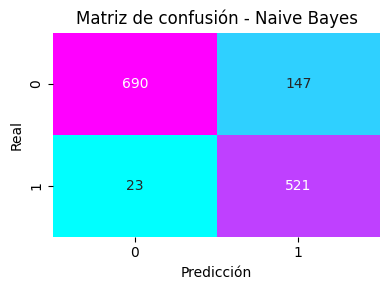

In [92]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Naive Bayes")

plt.tight_layout()
plt.show()

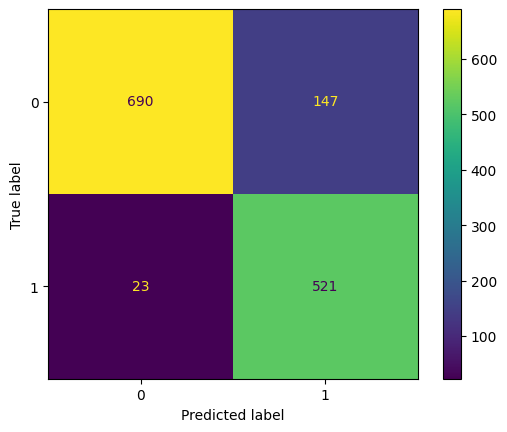

In [108]:
ConfusionMatrixDisplay(cm).plot()

In [93]:
print(f"Sensibilidad: {sensitivity}")
print(f"Especificidad: {specifity}")
print(f"Exactitud balanceada: {balanced_accuracy}")

Sensibilidad: 0.9577205882352942
Especificidad: 0.8243727598566308
Exactitud balanceada: 0.8910466740459625


In [99]:
target_names = ["No Spam", "SPAM"]
print(classification_report(y_test, y_pred_naive_bayes, target_names=target_names))

              precision    recall  f1-score   support

     No Spam       0.97      0.82      0.89       837
        SPAM       0.78      0.96      0.86       544

    accuracy                           0.88      1381
   macro avg       0.87      0.89      0.88      1381
weighted avg       0.89      0.88      0.88      1381



##### Métricas del modelo Naive Bayes

In [105]:
# accuracy_score, precision_score, recall_score, confusion_matrix,
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes)

print(f"Accuracy del modelo Naive Bayes: {accuracy_naive_bayes}")
print(f"Precision del modelo Naive Bayes: {precision_naive_bayes}")
print(f"Recall del modelo Naive Bayes: {recall_naive_bayes}")

Accuracy del modelo Naive Bayes: 0.8769007965242578
Precision del modelo Naive Bayes: 0.7799401197604791
Recall del modelo Naive Bayes: 0.9577205882352942


##### ROC - Naives Bayes

In [100]:
p_naive_bayes_pred = naive_bayes_model.predict_proba(X_test)

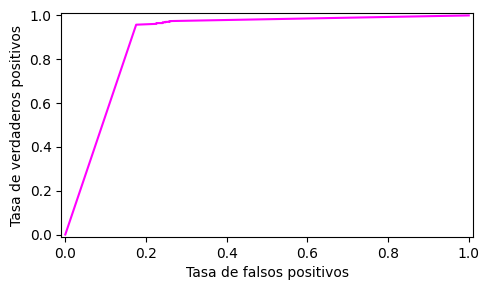

In [141]:
colors = ["#00FFFF", "#FF00FF", "#FF1493", "#00BFFF", "#FF6347"]

fpr_nb, tpr_nb, thr_nb = roc_curve(y_test, p_naive_bayes_pred[:, 1])

plt.figure(figsize=(5, 3))
plt.plot(fpr_nb, tpr_nb, color=colors[1])
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.tight_layout();

In [142]:
auc_naive_bayes = auc(fpr_nb, tpr_nb)

print(f"AUC para Logistic Regression: {auc_naive_bayes}")

AUC para Logistic Regression: 0.8958190579099023


### 4. Utilizando un **clasificador de Regresión Logística**, entrene el modelo con el conjunto de entrenamiento (en este caso, normalice los datos).

#### Resolución punto 4

In [121]:
columns_names = dataset.columns.tolist()
columns_names.remove(spam_col)

In [122]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), columns_names)
    ]
)

# Y luego el pipeline con regresión logística
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(random_state=random_state, class_weight="balanced"))
])

logistic_regression_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['word_freq_make',
                                                   'word_freq_address',
                                                   'word_freq_all',
                                                   'word_freq_3d',
                                                   'word_freq_our',
                                                   'word_freq_over',
                                                   'word_freq_remove',
                                                   'word_freq_internet',
                                                   'word_freq_order',
                                                   'word_freq_mail',
                                                   'word_freq_receive',
                                                   'word_freq_will',
                                                   'word_freq_people',
                                                   'word_freq_report',
                                                   'word_freq_a...es',
                                                   'word_freq_free',
                                                   'word_freq_business',
                                                   'word_freq_email',
                                                   'word_freq_you',
                                                   'word_freq_credit',
                                                   'word_freq_your',
                                                   'word_freq_font',
                                                   'word_freq_000',
                                                   'word_freq_money',
                                                   'word_freq_hp',
                                                   'word_freq_hpl',
                                                   'word_freq_george',
                                                   'word_freq_650',
                                                   'word_freq_lab',
                                                   'word_freq_labs', ...])])),
                ('regressor',
                 LogisticRegression(class_weight='balanced',
                                    random_state=100019))])

##### Evaluación del modelo Logistic Regression

In [123]:
print(f"Porcentaje de muestras bien clasificadas (todos los atributos): {(logistic_regression_model.score(X_test, y_test)*100)}%")

Porcentaje de muestras bien clasificadas (todos los atributos): 90.15206372194062%


In [124]:
def sens_spec(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    sensitivity = cm[1, 1] / np.sum(cm[1, :])
    specifity = cm[0, 0] / np.sum(cm[0, :])
    balanced_accuracy = (sensitivity + specifity) / 2

    return cm, sensitivity, specifity, balanced_accuracy

In [125]:
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

In [127]:
# Métricas
(cm_log_regr, sensitivity_log_regr, specifity_log_regr, balanced_accuracy_log_regr) = sens_spec(y_test, y_pred_logistic_regression)

In [131]:
print(f"Sensibilidad de Regresión Logística: {sensitivity_log_regr}")
print(f"Especificidad de Regresión Logística: {specifity_log_regr}")
print(f"Exactitud balanceada de Regresión Logística: {balanced_accuracy_log_regr}")

Sensibilidad de Regresión Logística: 0.8529411764705882
Especificidad de Regresión Logística: 0.9330943847072879
Exactitud balanceada de Regresión Logística: 0.8930177805889381


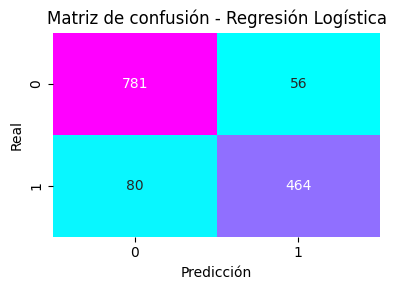

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm_log_regr, annot=True, fmt="d", cmap="cool", cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Regresión Logística")

plt.tight_layout()
plt.show()

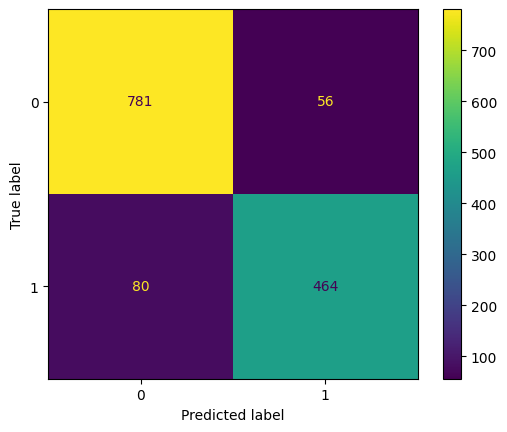

In [130]:
ConfusionMatrixDisplay(cm_log_regr).plot()

##### Métricas de Logistic Regression

In [ ]:
# accuracy_score, precision_score, recall_score, confusion_matrix,
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)

print(f"Accuracy del modelo Logistic Regression: {accuracy_logistic_regression}")
print(f"Precision del modelo Logistic Regression: {precision_logistic_regression}")
print(f"Recall del modelo Logistic Regression: {recall_logistic_regression}")

Accuracy del modelo Logistic Regression: 0.9015206372194062
Precision del modelo Logistic Regression: 0.8923076923076924
Recall del modelo Logistic Regression: 0.8529411764705882


##### ROC Logistic Regression

In [ ]:
p_logistic_regression_pred = logistic_regression_model.predict_proba(X_test)

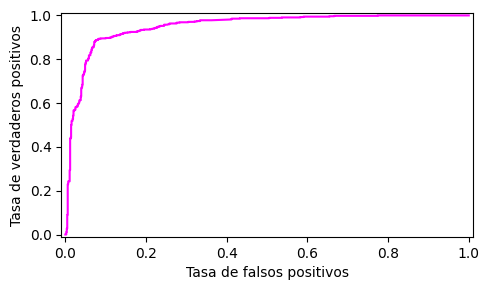

In [135]:
colors = ["#00FFFF", "#FF00FF", "#FF1493", "#00BFFF", "#FF6347"]

fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, p_logistic_regression_pred[:, 1])

plt.figure(figsize=(5, 3))
plt.plot(fpr_lr, tpr_lr, color=colors[1])
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.tight_layout();

In [140]:
auc_logistic_regression = auc(fpr_lr, tpr_lr)

print(f"AUC para Logistic Regression: {auc_logistic_regression}")

AUC para Logistic Regression: 0.949727449223417


### 5. Calcule la **matriz de confusión** en el conjunto de prueba para ambos modelos.

1. ¿Qué tipo de error comete más cada modelo?
1. ¿Cuál de los dos tipos de error considera más importante en este problema?

#### Respuesta ejercicio 5

***Tipos de Errores***

En nuestros modelos podemos tener estos errores:

- `Error Tipo 1` o Falsos Positivos, es decir, aquellos correos que NO son Spam pero nuestro clasificador califica como Spam.
- `Error Tipo 2` o Falsos Negativos, es decir, aquellos correos que SI son Spam pero nuestro clasificador califica como NO Spam.

***Naive Bayes***

Para el caso de nuestro clasificador *Naive Bayes*, hemos obtenido a partir de la matriz de confusión la siguiente información:

| Verdadero Positivo (TP) | Falso Positivo (FP) | Falso Negativo (FN) | Verdadero Negativo (TN) |
| --- | --- | --- | --- |
| 521 | 147 | 23 | 690 |

Es decir, tenemos los siguientes errores:

- `Error Tipo 1` o Falsos Positivos: $147$
- `Error Tipo 2` o Falsos Negativos: $23$

***Logistic Regression***

Para el caso de nuestro clasificador *Logistic Regression*, hemos obtenido a partir de la matriz de confusión la siguiente información:

| Verdadero Positivo (TP) | Falso Positivo (FP) | Falso Negativo (FN) | Verdadero Negativo (TN) |
| --- | --- | --- | --- |
| 464 | 56 | 80 | 781 |

Es decir, tenemos los siguientes errores:

- `Error Tipo 1` o Falsos Positivos: $56$
- `Error Tipo 2` o Falsos Negativos: $80$

***Respuestas***

> ¿Qué tipo de error comete más cada modelo?

El modelo `Naive Bayes` comete más `Errores Tipo 1`, mientras que el modelo `Logistic Regression` comete más `Errores Tipo 2`

> ¿Cuál de los dos tipos de error considera más importante en este problema?

Los errores más importantes para este problema son los `Errores Tipo 1` o clasificar un correo NO Spam como Spam. El motivo es que en estos casos estaríamos enviando información potencialmente útil para el usuario a la carpeta de SPAM. Por este motivo es que deberíamos utilizar (a priori) el modelo con menor cantidad de `Error Tipo 1`.

#### Código para la resolución del ejercicio 5

##### Naive Bayes

In [154]:
# Naive Bayes
y_pred_naive_bayes = naive_bayes_model.predict(X_test)
cm_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

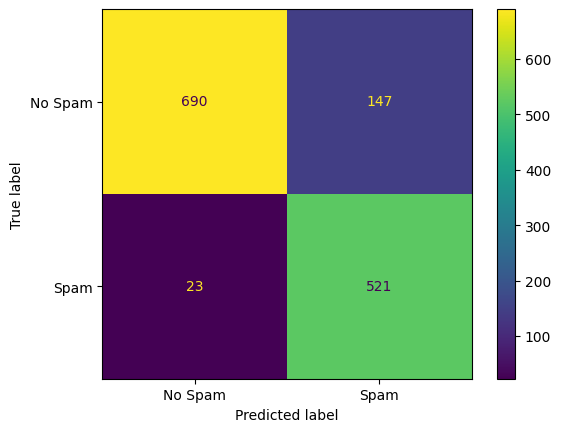

In [155]:
ConfusionMatrixDisplay(confusion_matrix=cm_bayes, display_labels=["No Spam", "Spam"]).plot()

##### Logistic Regression

In [152]:
# Logistic Regression
y_pred_logistic_regression = logistic_regression_model.predict(X_test)
cm_log_regr = confusion_matrix(y_test, y_pred_logistic_regression)

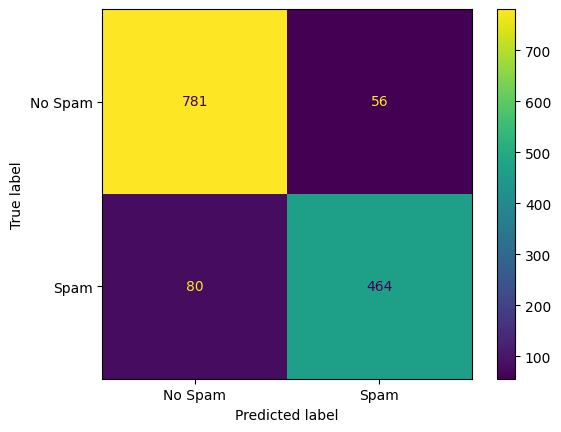

In [153]:
ConfusionMatrixDisplay(confusion_matrix=cm_log_regr, display_labels=["No Spam", "Spam"]).plot()

### 6. Calcule las **métricas de precisión (precision) y recuperación (recall)** para ambos modelos.

1. ¿Cuál es el mejor modelo según cada métrica?
1. ¿Cómo se relacionan estas métricas con los errores analizados en el punto anterior? Fundamente su respuesta.

#### Respuestas del ejercicio 6

| Modelo | Precision | Recall |
| --- | --- | --- |
| Naive Bayes | $\approx 0.78$ | $\approx 0.96$ |
| Logistic Regression | $\approx 0.89$ | $\approx 0.85$ |

<br>

> ¿Cuál es el mejor modelo según cada métrica?

Si nos basamos en la métrica de `Precision` el mejor modelo es `Logistic Regression`, pero si nos basamos en `Recall`, el mejor modelo es `Naive Bayes`.

> ¿Cómo se relacionan estas métricas con los errores analizados en el punto anterior? Fundamente su respuesta.

La métrica de `Precision` se relaciona con el *Error Tipo 1* o *False Positives* a partir de la fórmula $\frac{TP}{TP + FP}$. Esto quiere decir que a mayor valor de *Error Tipo 1*, menor *Precision*.
Esto puede verse para el caso del modelo `Naive Bayes`, el cual tiene un $Error Tipo 1 = 147$ y un $Precision \approx 0.78$, al compararlo con el modelo de `Logistic Regression` que tiene $Error Tipo 1 = 56$ y un $Precision \approx 0.89$

Por otra parte, la métrica de `Recall` se relaciona con el *Error Tipo 2* o *False Negatives* a partir de la fórmula $\frac{TP}{TP + FN}$. Esto implica que a mayor valor de *Error Tipo 2*, menor será el *Recall*.s
Esto lo podemos notar en el caso del modelo `Logistic Regression` que tiene un $Error Tipo 2 = 80$ y un $Recall \approx 0.85$, al compararlo con los valores de `Naive Bayes`: $Error Tipo 2 = 23$ y un $Recall \approx 0.96$

#### Código para la resolución del ejercicio 6

In [ ]:
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes)

print(f"Accuracy del modelo Naive Bayes: {accuracy_naive_bayes}")
print(f"Precision del modelo Naive Bayes: {precision_naive_bayes}")
print(f"Recall del modelo Naive Bayes: {recall_naive_bayes}")

Accuracy del modelo Naive Bayes: 0.8769007965242578
Precision del modelo Naive Bayes: 0.7799401197604791
Recall del modelo Naive Bayes: 0.9577205882352942


In [161]:
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)

print(f"Accuracy del modelo Logistic Regression: {accuracy_logistic_regression}")
print(f"Precision del modelo Logistic Regression: {precision_logistic_regression}")
print(f"Recall del modelo Logistic Regression: {recall_logistic_regression}")

Accuracy del modelo Logistic Regression: 0.9015206372194062
Precision del modelo Logistic Regression: 0.8923076923076924
Recall del modelo Logistic Regression: 0.8529411764705882


### 7. Obtenga la **curva ROC y el AUC (Área Bajo la Curva ROC)** de ambos modelos.